In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("users/baoqiangzhang/Downloads/messy_data.csv")

In [4]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [7]:
df.groupby("Product")["Income"].mean()

Product
A    51745.423588
B    61486.730790
C    50857.602438
D    49876.379810
Name: Income, dtype: float64

In [9]:
df.groupby("Product")["Income"].count()

Product
A    20
B    20
C    23
D    26
Name: Income, dtype: int64

In [11]:
df['Income'].describe()

count        94.000000
mean      52867.862808
std       29896.579420
min       20901.331720
25%       37814.315255
50%       48760.369705
75%       61644.277868
max      300000.000000
Name: Income, dtype: float64

In [12]:
df.groupby('Gender')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,54.0,49644.486259,15220.366090,27763.63630,37549.629215,47443.734975,59180.209903,94154.95125
Male,40.0,57219.421148,42222.682325,20901.33172,38144.018710,52807.321410,63330.314347,300000.00000


In [13]:
df.describe(include='all')

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Income', ylabel='Count'>

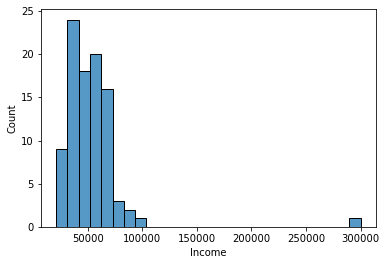

In [15]:
sns.histplot(df['Income'])

In [16]:
df.describe()

,Age,Income,Quantity
count,105.000000,94.000000,105.00000
mean,42.076190,52867.862808,3.20000
std,15.940813,29896.579420,1.44382
min,18.000000,20901.331720,1.00000
25%,31.000000,37814.315255,2.00000
50%,41.000000,48760.369705,3.00000
75%,55.000000,61644.277868,5.00000
max,120.000000,300000.000000,5.00000


In [19]:
df[df['Income']>250000]

,Age,Income,Gender,Product,Quantity
99,61,300000.0,Male,B,4


In [24]:
df_noout=df.set_index('Income').drop(300000)

In [26]:
df_noout

,Age,Gender,Product,Quantity
Income,,,,
59544.57663,56,Female,D,3
36399.18997,46,Female,NaN,1
57140.63881,32,Female,D,2
69554.91903,60,Male,C,5
53173.80518,25,Female,D,2
...,...,...,...,...
37341.55459,61,Male,D,5
35516.63492,55,Female,A,3
53254.05089,31,Male,B,2


<AxesSubplot:xlabel='Income', ylabel='Count'>

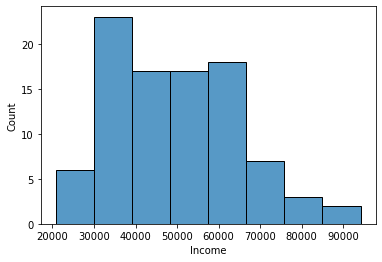

In [33]:
sns.histplot(df_noout.reset_index()['Income'])

<AxesSubplot:xlabel='Gender', ylabel='Income'>

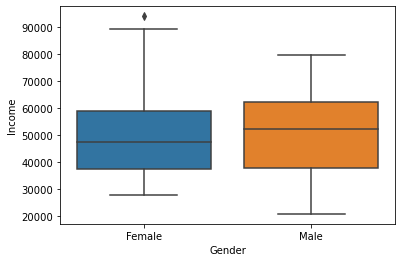

In [31]:
sns.boxplot(data=df_noout.reset_index(),x='Gender',y='Income')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

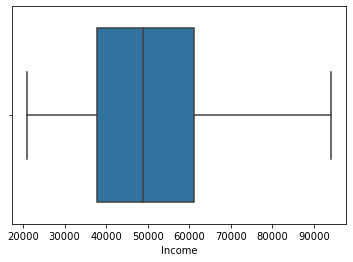

In [38]:
sns.boxplot(df_noout.reset_index()['Income'])

In [39]:
df_noout.reset_index(inplace=True)

In [40]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Income    93 non-null     float64
 1   Age       104 non-null    int64  
 2   Gender    104 non-null    object 
 3   Product   99 non-null     object 
 4   Quantity  104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [42]:
#fill in missing income data
df_noout.groupby('Gender')['Income'].median()

Gender
Female    47443.734975
Male      52529.890810
Name: Income, dtype: float64

In [43]:
df_noout.groupby('Gender')['Income'].transform('median')

0      47443.734975
1      47443.734975
2      47443.734975
3      52529.890810
4      47443.734975
           ...     
99     52529.890810
100    47443.734975
101    52529.890810
102    52529.890810
103    52529.890810
Name: Income, Length: 104, dtype: float64

In [44]:
df_noout['Income']=df_noout['Income'].fillna(df_noout.groupby('Gender')['Income'].transform('median'))

In [45]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Income    104 non-null    float64
 1   Age       104 non-null    int64  
 2   Gender    104 non-null    object 
 3   Product   99 non-null     object 
 4   Quantity  104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [ ]:
df_noout['Product']=df_noout['Product'].fillna('Unknown')

In [ ]:
df_noout.dropna(subset='Product',inplace=True) #drop all rows with missing data based on column

In [46]:
df_noout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Income    104 non-null    float64
 1   Age       104 non-null    int64  
 2   Gender    104 non-null    object 
 3   Product   99 non-null     object 
 4   Quantity  104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB
